In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Global_Mobile_Prices_2025_Extended.csv')

In [5]:
df.head()

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025


###Data Exploration

In [6]:
# Let's first check the basic structure of our dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic info:")
df.info()

Dataset shape: (1000, 15)

Column names:
['brand', 'model', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt', '5g_support', 'os', 'processor', 'rating', 'release_month', 'year']

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          10

In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64


In [8]:
# Get basic statistics for numerical columns
print("Basic statistics:")
df.describe()

Basic statistics:


,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,813.478000,9.17200,402.880000,83.534000,5012.000000,6.380600,63.791000,4.229900,2025.0
std,411.708367,4.32633,349.405893,62.504958,711.591429,0.496841,36.333751,0.439965,0.0
min,101.000000,4.00000,64.000000,12.000000,4000.000000,5.500000,18.000000,3.500000,2025.0
25%,449.250000,6.00000,128.000000,48.000000,4500.000000,6.000000,33.000000,3.800000,2025.0
50%,822.000000,8.00000,256.000000,64.000000,5000.000000,6.400000,65.000000,4.200000,2025.0
75%,1166.250000,12.00000,512.000000,108.000000,5500.000000,6.800000,100.000000,4.600000,2025.0
max,1499.000000,16.00000,1024.000000,200.000000,6000.000000,7.200000,120.000000,5.000000,2025.0


## Data Quality Check

In [9]:
# Check unique values in categorical columns
categorical_cols = ['brand', 'os', '5g_support', 'processor']
for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(10))


brand unique values: 9
brand
Vivo       122
Google     116
OnePlus    116
Xiaomi     114
Oppo       110
Apple      107
Realme     105
Infinix    105
Samsung    105
Name: count, dtype: int64

os unique values: 2
os
Android    893
iOS        107
Name: count, dtype: int64

5g_support unique values: 2
5g_support
Yes    503
No     497
Name: count, dtype: int64

processor unique values: 8
processor
Dimensity 9300         138
Tensor G4              133
Snapdragon 8 Gen 3     132
Helio G99              128
Exynos 2400            124
Snapdragon 6 Gen 1     118
Snapdragon 7+ Gen 2    115
A18 Pro                112
Name: count, dtype: int64


##Initial Visualizations

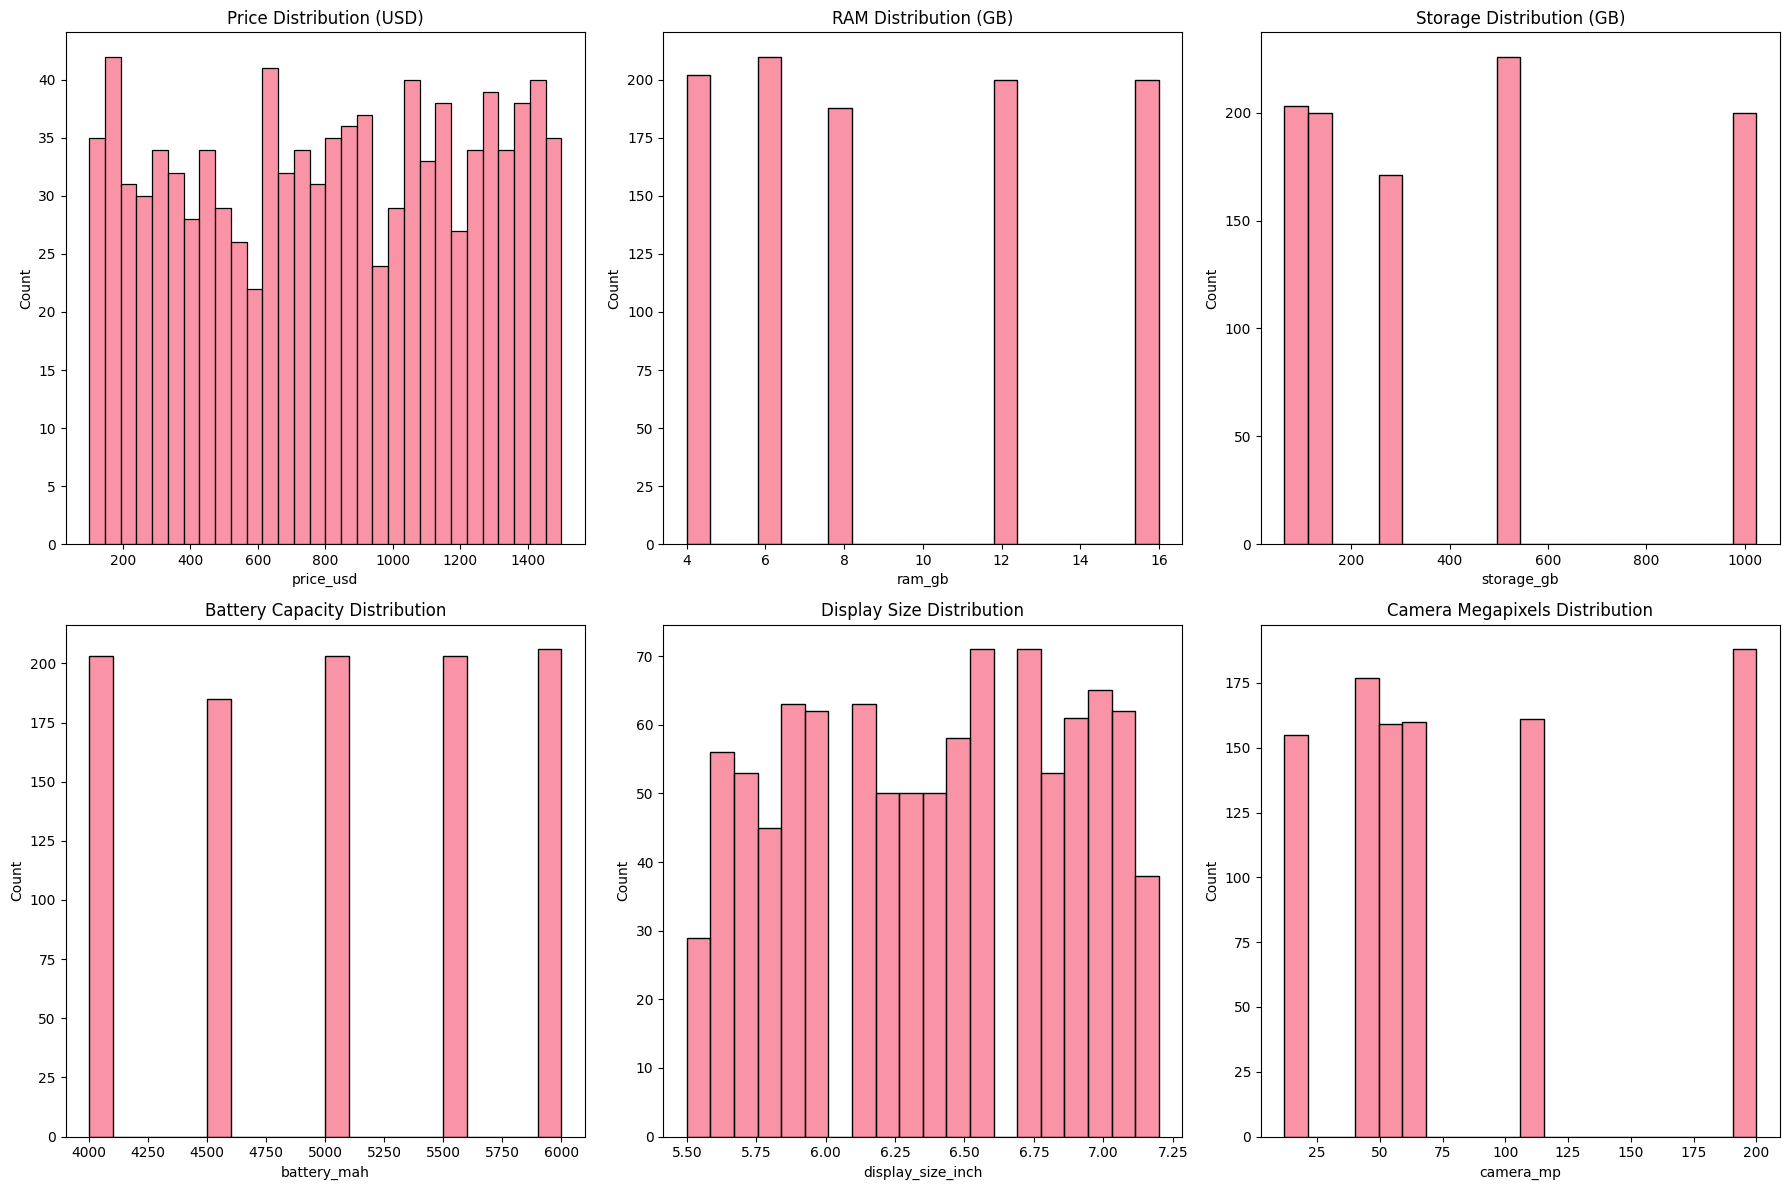

In [10]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Price distribution
sns.histplot(df['price_usd'], bins=30, ax=axes[0,0])
axes[0,0].set_title('Price Distribution (USD)')

# RAM distribution
sns.histplot(df['ram_gb'], bins=20, ax=axes[0,1])
axes[0,1].set_title('RAM Distribution (GB)')

# Storage distribution
sns.histplot(df['storage_gb'], bins=20, ax=axes[0,2])
axes[0,2].set_title('Storage Distribution (GB)')

# Battery distribution
sns.histplot(df['battery_mah'], bins=20, ax=axes[1,0])
axes[1,0].set_title('Battery Capacity Distribution')

# Display size distribution
sns.histplot(df['display_size_inch'], bins=20, ax=axes[1,1])
axes[1,1].set_title('Display Size Distribution')

# Camera distribution
sns.histplot(df['camera_mp'], bins=20, ax=axes[1,2])
axes[1,2].set_title('Camera Megapixels Distribution')

plt.tight_layout()
plt.show()

##Brand Analysis

Number of models by brand:
brand
Vivo       122
Google     116
OnePlus    116
Xiaomi     114
Oppo       110
Apple      107
Realme     105
Infinix    105
Samsung    105
Name: count, dtype: int64


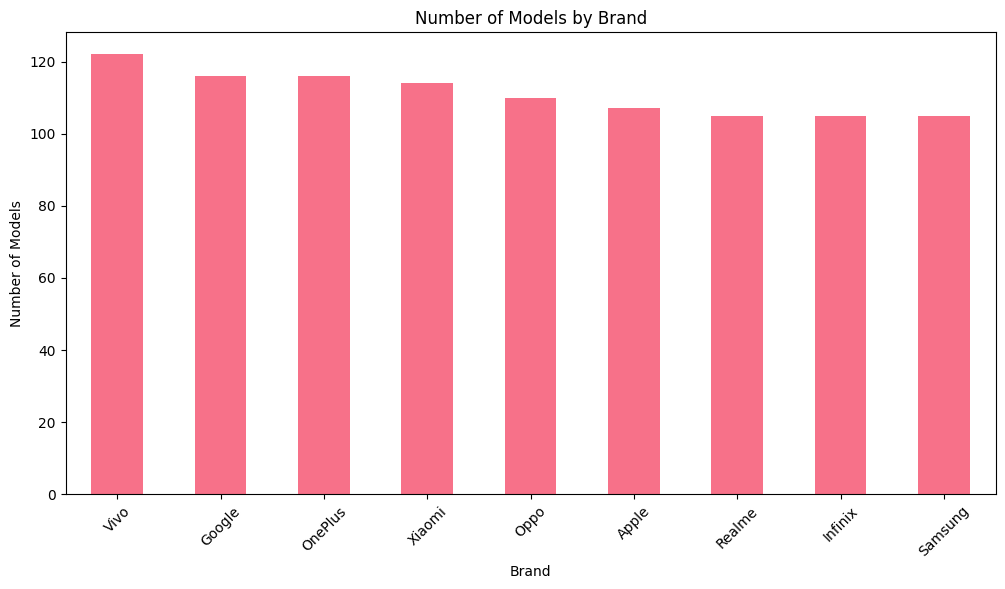

In [11]:
# Analyze brands
print("Number of models by brand:")
brand_counts = df['brand'].value_counts()
print(brand_counts)

# Plot brand distribution
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.title('Number of Models by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()

##Price Analysis by Brand

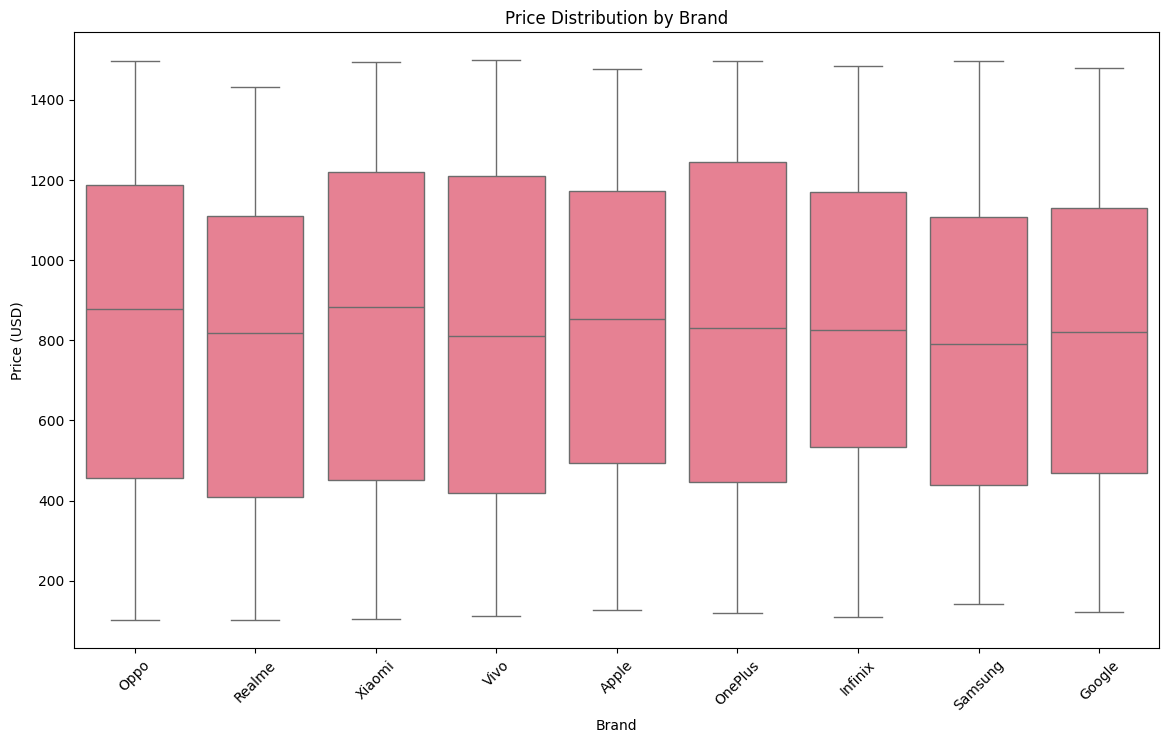


Average price by brand:
               mean  median  count
brand                             
Infinix  839.171429   825.0    105
Apple    835.691589   853.0    107
Xiaomi   827.736842   883.0    114
Oppo     826.327273   877.5    110
OnePlus  812.250000   831.5    116
Google   808.060345   820.5    116
Vivo     807.901639   811.0    122
Samsung  791.723810   792.0    105
Realme   771.780952   818.0    105


In [12]:
# Price analysis by brand
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='brand', y='price_usd')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.ylabel('Price (USD)')
plt.xlabel('Brand')
plt.show()

# Calculate average price by brand
avg_price_by_brand = df.groupby('brand')['price_usd'].agg(['mean', 'median', 'count'])
print("\nAverage price by brand:")
print(avg_price_by_brand.sort_values('mean', ascending=False))

## Operating System Analysis

Operating System distribution:
os
Android    893
iOS        107
Name: count, dtype: int64


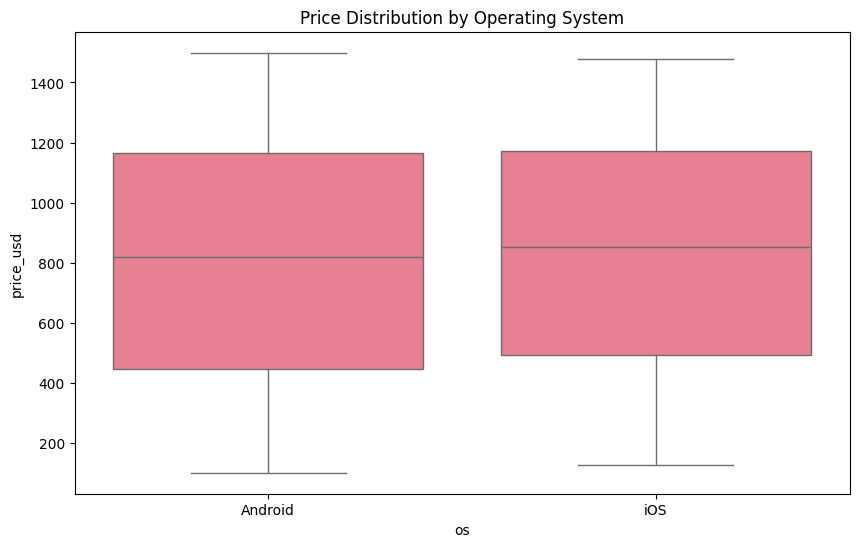

In [13]:
# OS distribution
print("Operating System distribution:")
print(df['os'].value_counts())

# Price by OS
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='os', y='price_usd')
plt.title('Price Distribution by Operating System')
plt.show()

##5G Support Analysis

5G Support distribution:
5g_support
Yes    503
No     497
Name: count, dtype: int64


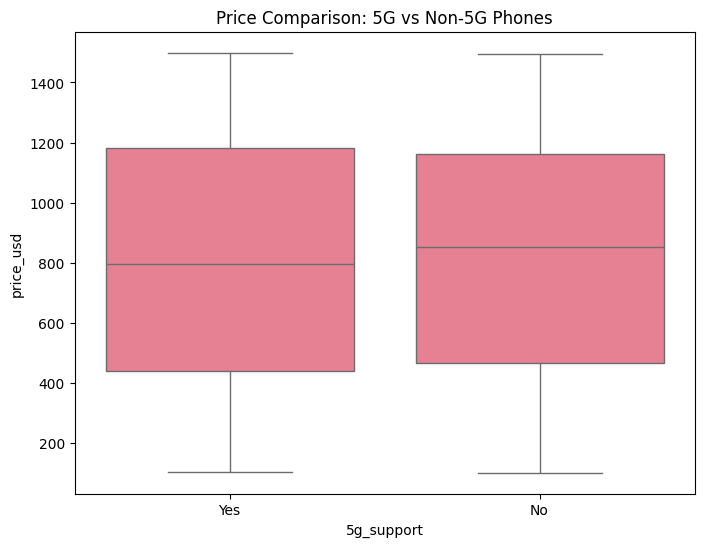


Average price - 5G phones: $805.22
Average price - Non-5G phones: $821.83


In [14]:
# 5G support analysis
print("5G Support distribution:")
print(df['5g_support'].value_counts())

# Compare prices for 5G vs non-5G phones
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='5g_support', y='price_usd')
plt.title('Price Comparison: 5G vs Non-5G Phones')
plt.show()

# Check if there's a price premium for 5G
avg_price_5g = df.groupby('5g_support')['price_usd'].mean()
print(f"\nAverage price - 5G phones: ${avg_price_5g['Yes']:.2f}")
print(f"Average price - Non-5G phones: ${avg_price_5g['No']:.2f}")

##Correlation Analysis

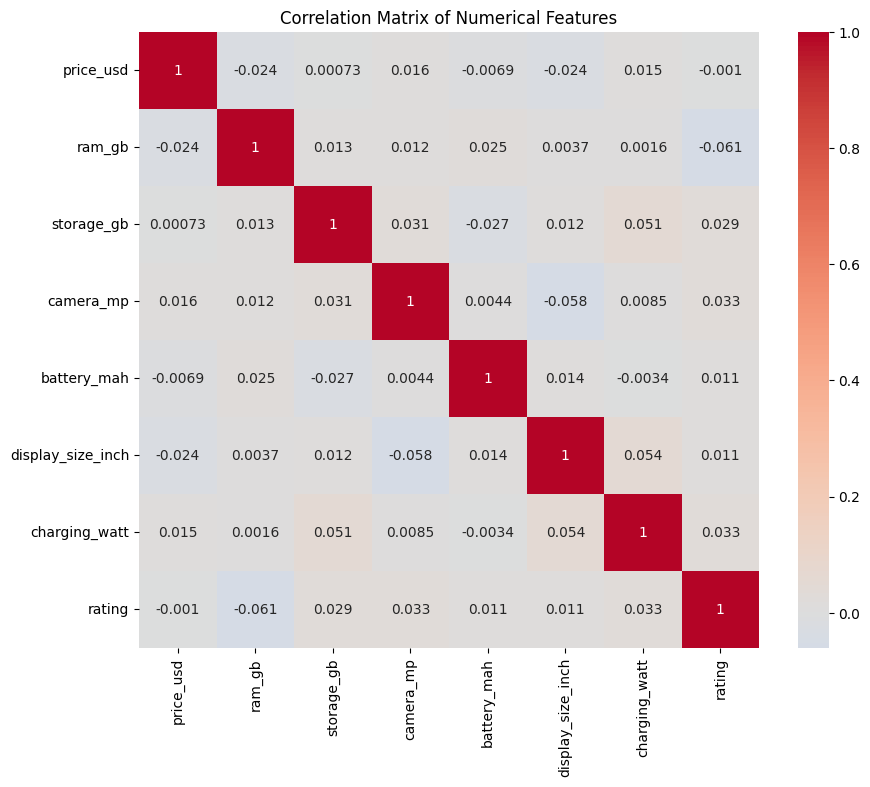


Features most correlated with price:
price_usd            1.000000
camera_mp            0.015682
charging_watt        0.014869
storage_gb           0.000730
rating              -0.001010
battery_mah         -0.006909
display_size_inch   -0.023611
ram_gb              -0.023628
Name: price_usd, dtype: float64


In [15]:
# Select numerical columns for correlation
numerical_cols = ['price_usd', 'ram_gb', 'storage_gb', 'camera_mp',
                 'battery_mah', 'display_size_inch', 'charging_watt', 'rating']

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Most correlated features with price
price_correlations = correlation_matrix['price_usd'].sort_values(ascending=False)
print("\nFeatures most correlated with price:")
print(price_correlations)

##Initial Insights Summary

In [16]:
print("=== INITIAL INSIGHTS SUMMARY ===")
print(f"Total phones in dataset: {len(df)}")
print(f"Number of brands: {df['brand'].nunique()}")
print(f"Price range: ${df['price_usd'].min()} - ${df['price_usd'].max()}")
print(f"Average price: ${df['price_usd'].mean():.2f}")
print(f"5G penetration: {(df['5g_support'] == 'Yes').mean()*100:.1f}%")
print(f"Operating systems: {', '.join(df['os'].unique())}")

=== INITIAL INSIGHTS SUMMARY ===
Total phones in dataset: 1000
Number of brands: 9
Price range: $101 - $1499
Average price: $813.48
5G penetration: 50.3%
Operating systems: Android, iOS


##Investigating the Price Correlations

=== DEEPER PRICE ANALYSIS ===


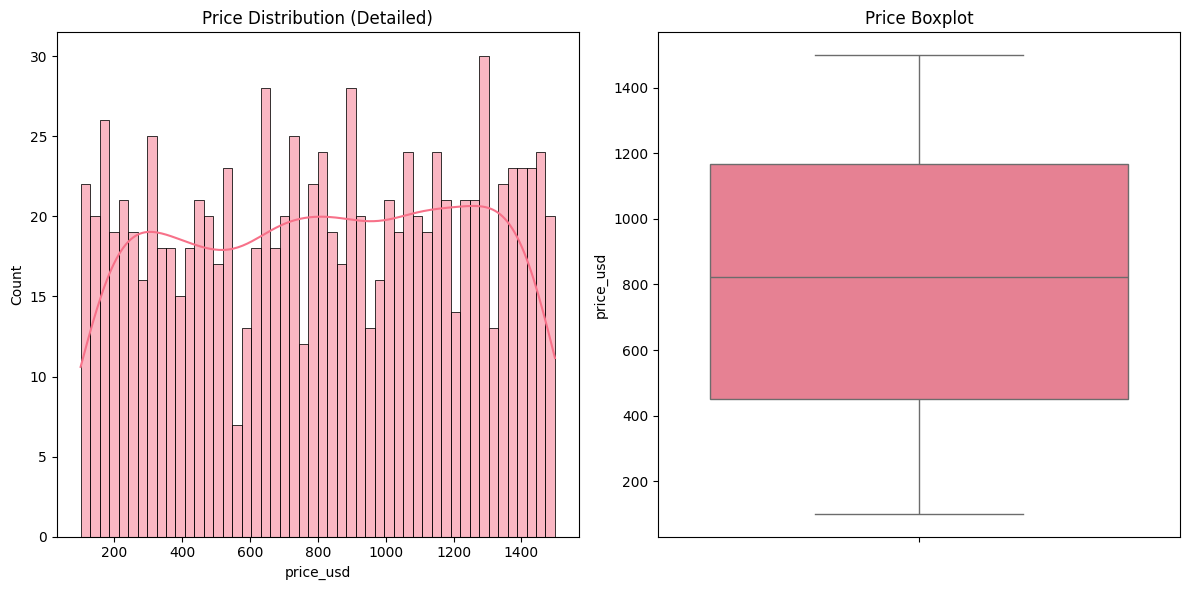


Price Quantiles:
25.0%: $449.25
50.0%: $822.00
75.0%: $1166.25
90.0%: $1375.40
95.0%: $1435.05


In [17]:
# Let's examine why correlations are so low
print("=== DEEPER PRICE ANALYSIS ===")

# Check if there are different price segments
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price_usd'], bins=50, kde=True)
plt.title('Price Distribution (Detailed)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='price_usd')
plt.title('Price Boxplot')
plt.tight_layout()
plt.show()

# Check price distribution by quantiles
price_quantiles = df['price_usd'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])
print("\nPrice Quantiles:")
for q, price in price_quantiles.items():
    print(f"{q*100}%: ${price:.2f}")

##Brand-Specific Deep Dive

=== BRAND-WISE COMPARISON ===
        price_usd                      ram_gb storage_gb camera_mp  \
             mean median     std count   mean       mean      mean   
brand                                                                
Apple      835.69  853.0  404.49   107   8.71     394.77     82.92   
Google     808.06  820.5  403.92   116   9.12     372.41     80.72   
Infinix    839.17  825.0  386.79   105   9.31     379.12     85.43   
OnePlus    812.25  831.5  431.79   116   8.71     447.45     85.53   
Oppo       826.33  877.5  431.84   110   8.96     484.65     85.16   
Realme     771.78  818.0  398.61   105   9.49     385.83     83.41   
Samsung    791.72  792.0  390.55   105   9.56     352.30     84.17   
Vivo       807.90  811.0  431.96   122   9.41     395.54     84.97   
Xiaomi     827.74  883.0  426.29   114   9.30     409.26     79.61   

        battery_mah rating  
               mean   mean  
brand                       
Apple       4925.23   4.22  
Google      5

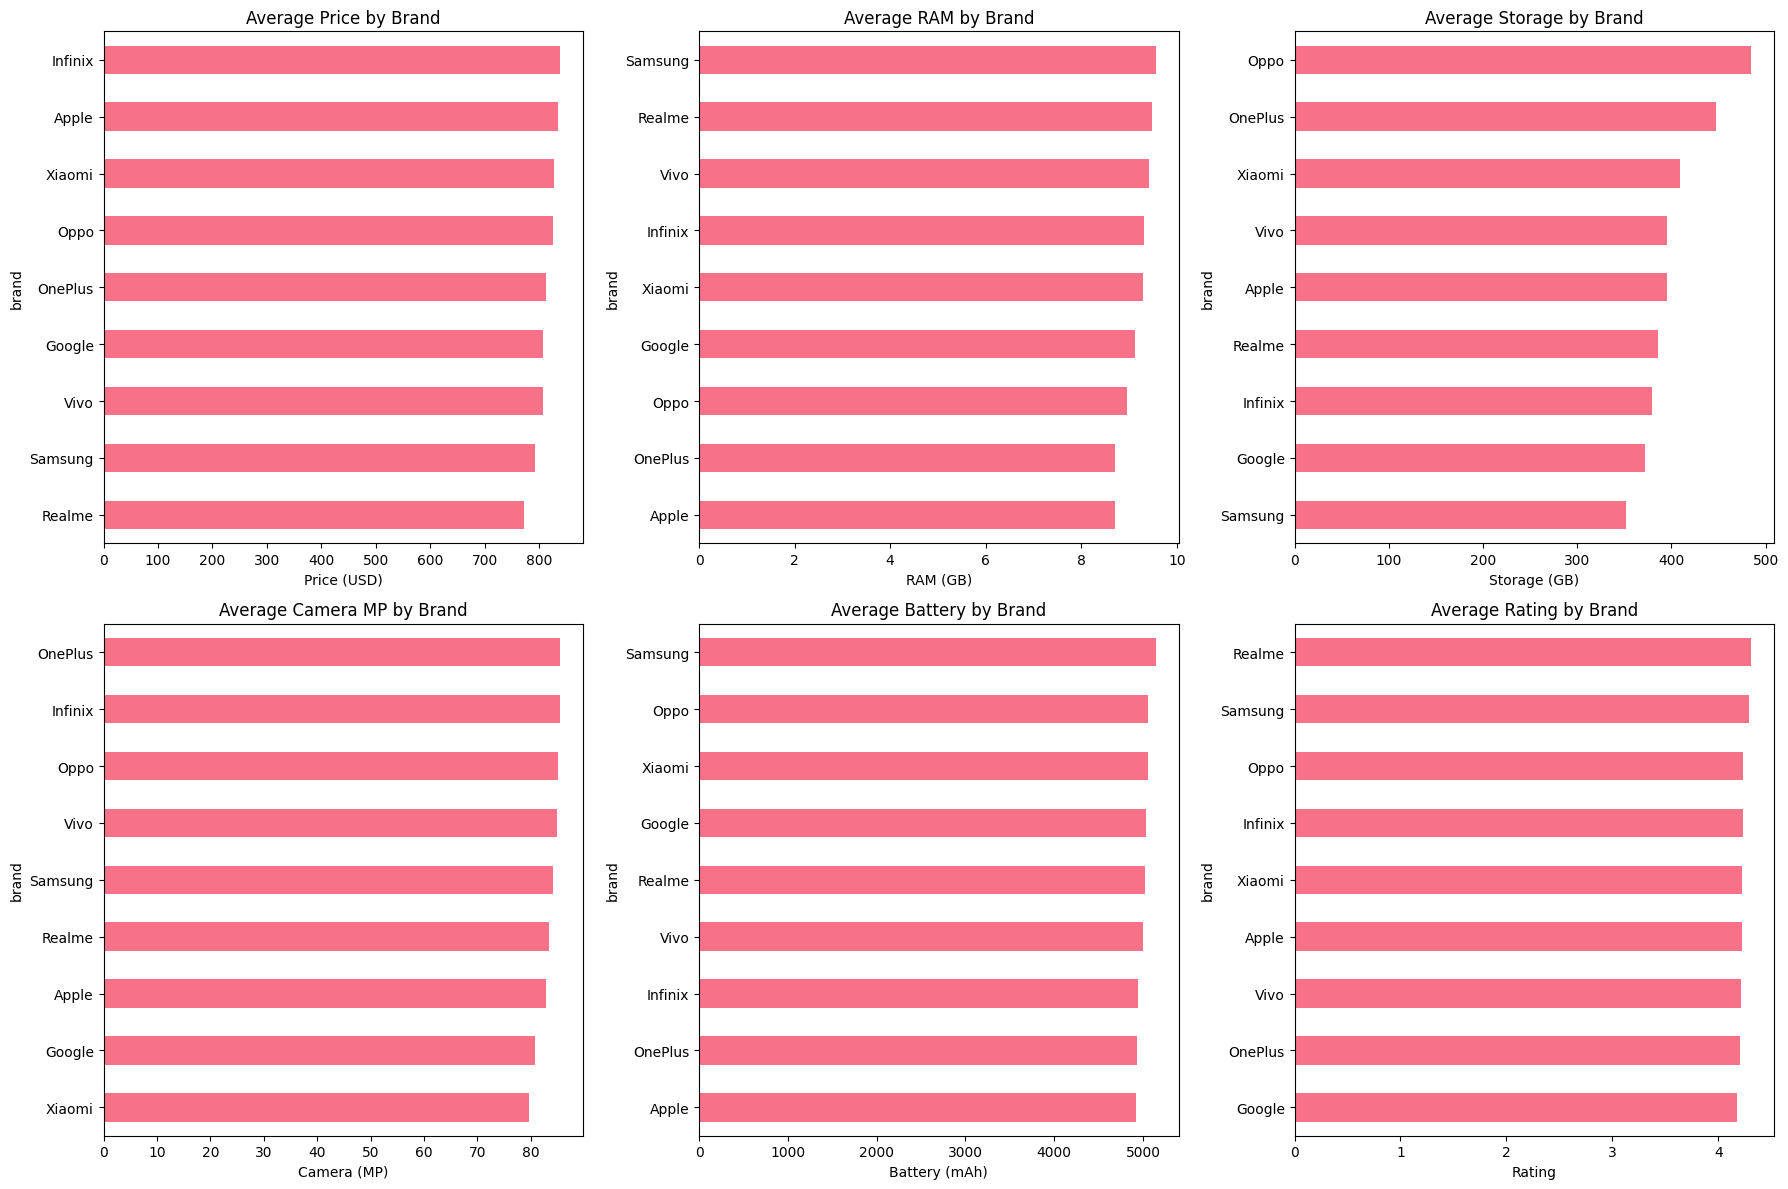

In [18]:
# Let's analyze each brand in more detail
brand_analysis = df.groupby('brand').agg({
    'price_usd': ['mean', 'median', 'std', 'count'],
    'ram_gb': 'mean',
    'storage_gb': 'mean',
    'camera_mp': 'mean',
    'battery_mah': 'mean',
    'rating': 'mean'
}).round(2)

print("=== BRAND-WISE COMPARISON ===")
print(brand_analysis)

# Visualize key metrics by brand
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Average price by brand
brand_analysis[('price_usd', 'mean')].sort_values().plot(kind='barh', ax=axes[0,0])
axes[0,0].set_title('Average Price by Brand')
axes[0,0].set_xlabel('Price (USD)')

# Average RAM by brand
brand_analysis[('ram_gb', 'mean')].sort_values().plot(kind='barh', ax=axes[0,1])
axes[0,1].set_title('Average RAM by Brand')
axes[0,1].set_xlabel('RAM (GB)')

# Average storage by brand
brand_analysis[('storage_gb', 'mean')].sort_values().plot(kind='barh', ax=axes[0,2])
axes[0,2].set_title('Average Storage by Brand')
axes[0,2].set_xlabel('Storage (GB)')

# Average camera by brand
brand_analysis[('camera_mp', 'mean')].sort_values().plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title('Average Camera MP by Brand')
axes[1,0].set_xlabel('Camera (MP)')

# Average battery by brand
brand_analysis[('battery_mah', 'mean')].sort_values().plot(kind='barh', ax=axes[1,1])
axes[1,1].set_title('Average Battery by Brand')
axes[1,1].set_xlabel('Battery (mAh)')

# Average rating by brand
brand_analysis[('rating', 'mean')].sort_values().plot(kind='barh', ax=axes[1,2])
axes[1,2].set_title('Average Rating by Brand')
axes[1,2].set_xlabel('Rating')

plt.tight_layout()
plt.show()

##Price Segment Analysis

In [19]:
# Create price segments
def price_segment(price):
    if price <= 300:
        return 'Budget (<$300)'
    elif price <= 600:
        return 'Mid-Range ($300-$600)'
    elif price <= 900:
        return 'Premium Mid-Range ($600-$900)'
    else:
        return 'Flagship (>$900)'

df['price_segment'] = df['price_usd'].apply(price_segment)

print("=== PRICE SEGMENT ANALYSIS ===")
segment_counts = df['price_segment'].value_counts()
print(segment_counts)

# Analyze features by price segment
segment_analysis = df.groupby('price_segment').agg({
    'price_usd': ['mean', 'count'],
    'ram_gb': 'mean',
    'storage_gb': 'mean',
    'camera_mp': 'mean',
    'battery_mah': 'mean',
    'display_size_inch': 'mean',
    'charging_watt': 'mean',
    '5g_support': lambda x: (x == 'Yes').mean() * 100
}).round(2)

print("\nFeatures by Price Segment:")
print(segment_analysis)

=== PRICE SEGMENT ANALYSIS ===
price_segment
Flagship (>$900)                 437
Premium Mid-Range ($600-$900)    228
Mid-Range ($300-$600)            187
Budget (<$300)                   148
Name: count, dtype: int64

Features by Price Segment:
                              price_usd       ram_gb storage_gb camera_mp  \
                                   mean count   mean       mean      mean   
price_segment                                                               
Budget (<$300)                   197.85   148   9.32     406.05     83.99   
Flagship (>$900)                1213.44   437   8.97     405.82     85.90   
Mid-Range ($300-$600)            439.12   187   9.38     421.99     82.77   
Premium Mid-Range ($600-$900)    753.54   228   9.28     379.51     79.33   

                              battery_mah display_size_inch charging_watt  \
                                     mean              mean          mean   
price_segment                                              

##Visualization by Price Segments

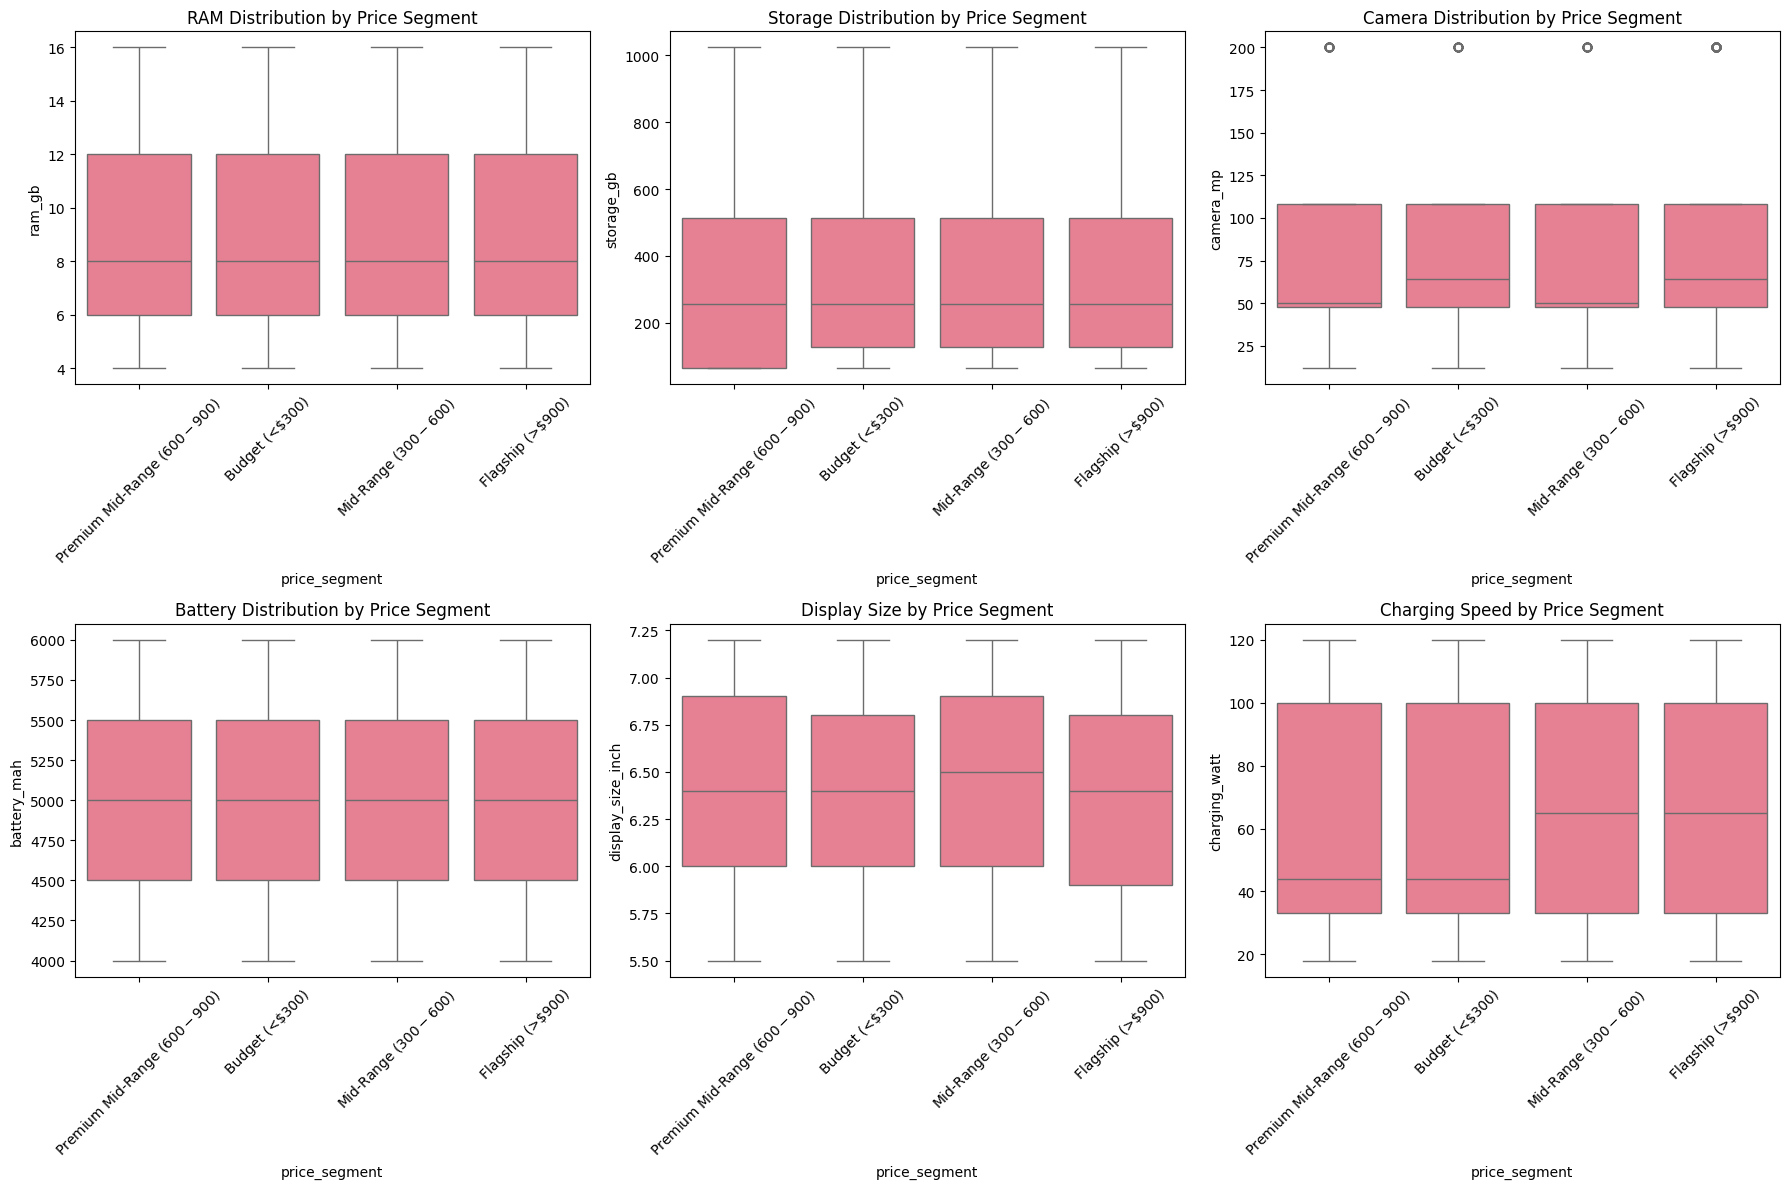

In [20]:
# Visualize distributions across price segments
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# RAM by price segment
sns.boxplot(data=df, x='price_segment', y='ram_gb', ax=axes[0,0])
axes[0,0].set_title('RAM Distribution by Price Segment')
axes[0,0].tick_params(axis='x', rotation=45)

# Storage by price segment
sns.boxplot(data=df, x='price_segment', y='storage_gb', ax=axes[0,1])
axes[0,1].set_title('Storage Distribution by Price Segment')
axes[0,1].tick_params(axis='x', rotation=45)

# Camera by price segment
sns.boxplot(data=df, x='price_segment', y='camera_mp', ax=axes[0,2])
axes[0,2].set_title('Camera Distribution by Price Segment')
axes[0,2].tick_params(axis='x', rotation=45)

# Battery by price segment
sns.boxplot(data=df, x='price_segment', y='battery_mah', ax=axes[1,0])
axes[1,0].set_title('Battery Distribution by Price Segment')
axes[1,0].tick_params(axis='x', rotation=45)

# Display size by price segment
sns.boxplot(data=df, x='price_segment', y='display_size_inch', ax=axes[1,1])
axes[1,1].set_title('Display Size by Price Segment')
axes[1,1].tick_params(axis='x', rotation=45)

# Charging wattage by price segment
sns.boxplot(data=df, x='price_segment', y='charging_watt', ax=axes[1,2])
axes[1,2].set_title('Charging Speed by Price Segment')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Processor Analysis

In [21]:
# Let's analyze processors
print("=== PROCESSOR ANALYSIS ===")

# Top processors by count
top_processors = df['processor'].value_counts().head(15)
print("Top 15 Processors:")
print(top_processors)

# Analyze price by processor (for processors with sufficient samples)
processor_stats = df.groupby('processor').agg({
    'price_usd': ['mean', 'count'],
    'ram_gb': 'mean',
    'rating': 'mean'
}).round(2)

# Filter for processors with at least 10 devices
popular_processors = processor_stats[processor_stats[('price_usd', 'count')] >= 10]
popular_processors = popular_processors.sort_values(('price_usd', 'mean'), ascending=False)

print("\nPopular Processors (10+ devices) - by Average Price:")
print(popular_processors.head(10))

=== PROCESSOR ANALYSIS ===
Top 15 Processors:
processor
Dimensity 9300         138
Tensor G4              133
Snapdragon 8 Gen 3     132
Helio G99              128
Exynos 2400            124
Snapdragon 6 Gen 1     118
Snapdragon 7+ Gen 2    115
A18 Pro                112
Name: count, dtype: int64

Popular Processors (10+ devices) - by Average Price:
                    price_usd       ram_gb rating
                         mean count   mean   mean
processor                                        
Snapdragon 7+ Gen 2    877.11   115   9.48   4.22
Snapdragon 8 Gen 3     857.45   132   9.20   4.23
Exynos 2400            829.03   124   9.03   4.23
Dimensity 9300         817.47   138   9.64   4.25
Helio G99              795.03   128   8.73   4.23
A18 Pro                793.32   112   9.34   4.25
Tensor G4              774.73   133   8.81   4.21
Snapdragon 6 Gen 1     764.08   118   9.17   4.24
